In [20]:
# %load /home/sid/libs.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.io.arff import loadarff
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
%matplotlib inline

In [11]:
X_train = pd.read_csv('train.csv', index_col=0)
y_train = X_train['y']
X_train.drop(['y'], axis=1, inplace=True)

In [12]:
X_test = pd.read_csv('test.csv', index_col=0)
y_test = X_test['y']
X_test.drop(['y'], axis=1, inplace=True)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((66143, 39), (66143,), (8683, 39), (8683,))

Accuracy: 87.67%
F1_score:  0.34495412844
precision_score 0.236180904523
recall_score 0.639455782313
roc_auc_score 0.764401514064
cm matrix [[7330  912]
 [ 159  282]]


(441, 1194)

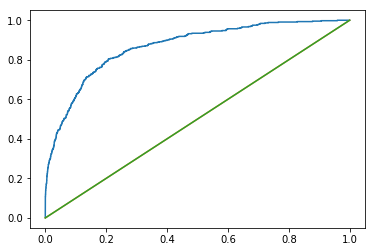

In [19]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print "Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100)
print "F1_score: ", f1_score(y_test, y_pred)
print "precision_score", precision_score(y_test, y_pred)
print "recall_score", recall_score(y_test, y_pred)
print "roc_auc_score", roc_auc_score(y_test, y_pred)
print "cm matrix", confusion_matrix(y_test, y_pred)
scores = [n for m, n in model.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test[y_test == 1]), len(y_pred[y_pred == 1])

In [18]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

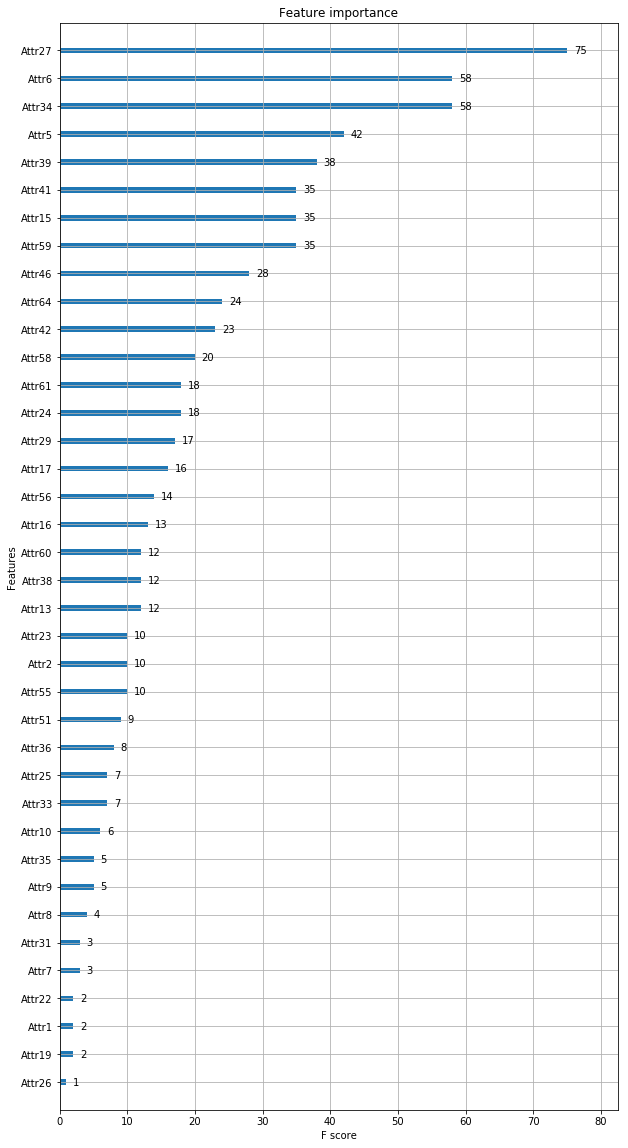

In [26]:
fig, ax = plt.subplots(1,1,figsize=(10, 20))
plot_importance(model, ax=ax)

[0]	validation_0-logloss:0.663548
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.639456
[2]	validation_0-logloss:0.615552
[3]	validation_0-logloss:0.596973
[4]	validation_0-logloss:0.581518
[5]	validation_0-logloss:0.566294
[6]	validation_0-logloss:0.554001
[7]	validation_0-logloss:0.542915
[8]	validation_0-logloss:0.533426
[9]	validation_0-logloss:0.521842
[10]	validation_0-logloss:0.513481
[11]	validation_0-logloss:0.506746
[12]	validation_0-logloss:0.497212
[13]	validation_0-logloss:0.489762
[14]	validation_0-logloss:0.483963
[15]	validation_0-logloss:0.478042
[16]	validation_0-logloss:0.470294
[17]	validation_0-logloss:0.463668
[18]	validation_0-logloss:0.459767
[19]	validation_0-logloss:0.455205
[20]	validation_0-logloss:0.452363
[21]	validation_0-logloss:0.446321
[22]	validation_0-logloss:0.441973
[23]	validation_0-logloss:0.439599
[24]	validation_0-logloss:0.434892
[25]	validation_0-logloss:0.431711
[26]	validation_0-logloss:0.4268

(441, 1194)

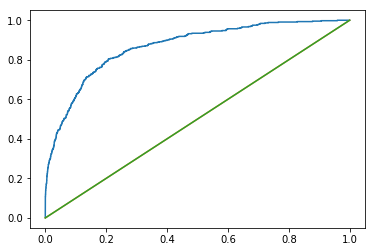

In [27]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
y_pred = model.predict(X_test)
print "Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100)
print "F1_score: ", f1_score(y_test, y_pred)
print "precision_score", precision_score(y_test, y_pred)
print "recall_score", recall_score(y_test, y_pred)
print "roc_auc_score", roc_auc_score(y_test, y_pred)
print "cm matrix", confusion_matrix(y_test, y_pred)
scores = [n for m, n in model.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test[y_test == 1]), len(y_pred[y_pred == 1])